# 부동산데이터 분석

In [5]:
import pandas as pd #판다스 불러오기
import numpy as np #넘파이 불러오기
df = pd.read_csv('/content/apt201302.csv', encoding = 'cp949')
df.head()

,시군구,구,동,단지명,전용면적(㎡),계약년월,단가,계약일,가격,층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,서울특별시,강남구,압구정동,"현대6차(78~81,83,84,86,87동)",157.000,202302,3694.267516,14,580000,4,1978,압구정로 201,NaN,중개거래,서울 강남구
1,서울특별시,서초구,반포동,반포자이,194.515,202302,2724.725600,28,530000,17,2009,신반포로 270,NaN,중개거래,서울 서초구
2,서울특별시,강남구,압구정동,"현대7차(73~77,82,85동)",157.360,202302,3171.072700,4,499000,11,1979,압구정로 201,NaN,중개거래,서울 강남구
3,서울특별시,용산구,한남동,트윈빌에이동,222.690,202302,2020.746329,20,450000,5,2008,유엔빌리지길 11,NaN,직거래,-
4,서울특별시,서초구,반포동,반포주공1단지,104.890,202302,4099.532844,17,430000,5,1973,신반포로 9,NaN,중개거래,서울 서초구


## 빈도분석

빈도분석(frequency): 데이터에서 각 값이 몇 번씩 나타나는지를 살펴보는 것

In [6]:
#빈도분석: 구/단지별 몇 건의 거래량이 이뤄졌나?
frequency = df['구'].value_counts()
print(frequency[:5])

송파구    236
강동구    200
노원구    176
강남구    163
강서구    148
Name: 구, dtype: int64


## 집단별 평균

groupby( 특정 칼럼 지정 ) 그 칼럼에 해당하는 값들을 처리할 수 있음

In [7]:
#평균
result = df.groupby('구')['가격'].mean() # print(result)를 통해서 결과 보여줄 것
print(result[:10])

구
강남구    177879.938650
강동구    100076.400000
강북구     56915.833333
강서구     76589.797297
관악구     63778.260870
광진구    103986.956522
구로구     59877.263158
금천구     61606.451613
노원구     58214.204545
도봉구     49868.316832
Name: 가격, dtype: float64


## 기초통계

describe함수: 중요한 기초통계에 관한 값 제시


In [8]:
#기초통계 요약: describe
result = df.groupby('구')['가격'].describe() # print(result)를 통해서 결과
print(result.sort_values(by="mean", ascending=False)) #올림차순, 'mean'기준

      count           mean            std      min       25%       50%  \
구                                                                        
서초구    67.0  215552.238806   98278.517888  29500.0  160300.0  200000.0   
용산구    19.0  179268.421053  120588.893226  16000.0   93000.0  159000.0   
강남구   163.0  177879.938650   84773.717432  21000.0  106000.0  172000.0   
송파구   236.0  148318.050847   52313.402973  11000.0  102875.0  158250.0   
성동구    84.0  106191.071429   28737.927964  17000.0   86000.0  104900.0   
마포구    87.0  105177.011494   40428.221496  12000.0   80500.0  104500.0   
광진구    46.0  103986.956522   43944.907978  13700.0   87375.0  105350.0   
강동구   200.0  100076.400000   27508.186174  10500.0   81975.0  100500.0   
양천구   114.0   97542.105263   44315.308078  21000.0   67450.0   92850.0   
종로구    21.0   95621.428571   61733.209400  11700.0   45000.0   74000.0   
동작구    61.0   92188.524590   37585.773454  12900.0   77000.0   96000.0   
영등포구   98.0   88512.142857   50178.565

## 특정 문자를 가진 행 찾기

str.contains(찾고 싶은 문자)

In [9]:
df[df['동'].str.contains('압구정')]

,시군구,구,동,단지명,전용면적(㎡),계약년월,단가,계약일,가격,층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,서울특별시,강남구,압구정동,"현대6차(78~81,83,84,86,87동)",157.00,202302,3694.267516,14,580000,4,1978,압구정로 201,NaN,중개거래,서울 강남구
2,서울특별시,강남구,압구정동,"현대7차(73~77,82,85동)",157.36,202302,3171.072700,4,499000,11,1979,압구정로 201,NaN,중개거래,서울 강남구
9,서울특별시,강남구,압구정동,"현대1차(12,13,21,22,31,32,33동)",131.48,202302,2700.030423,17,355000,2,1976,압구정로29길 71,NaN,중개거래,서울 강남구
15,서울특별시,강남구,압구정동,신현대9차,111.38,202302,3007.721314,18,335000,9,1982,압구정로 151,NaN,중개거래,서울 강남구
39,서울특별시,강남구,압구정동,한양5,102.35,202302,2735.710796,23,280000,13,1979,압구정로 401,NaN,중개거래,서울 강남구
67,서울특별시,강남구,압구정동,미성2차,74.40,202302,3293.010753,16,245000,7,1987,압구정로 113,NaN,중개거래,서울 강남구


## 결과값 저장

1. 클립보드로 저장하기: 엑셀 등 파일에서 불러올 수 있음
2. csv 파일로 저장하기

**한글 저장 오류 시 encoding = "utf-8-sig"**

In [10]:
#결과값 클립보드로 붙여넣기
#result.to_clipboard()

#결과값 csv파일로 만들기
result.to_csv(r"C:\Users\skytr\OneDrive\문서\PythonBasic\데이터\new.csv", encoding="utf-8-sig")


## 그래프 그리기

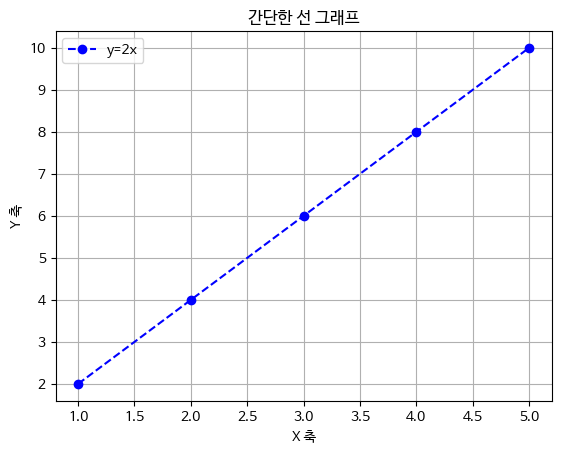

In [11]:
import matplotlib.pyplot as plt

# 샘플 데이터
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# 선 그래프 그리기 label="그래프명", color 색깔, linestyle
plt.plot(x, y, label='y=2x', color='blue', linestyle='--', marker='o')
plt.xlabel('X 축') # x축 이름
plt.ylabel('Y 축') # y축 이름
plt.title('간단한 선 그래프') # 제목
plt.legend() #범례
plt.grid(True) #눈금선
plt.show()

In [12]:
# 한글폰트깨짐 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype/font-awesome: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/opentype/mathjax: caching, new cache contents: 24 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/truetype/font-awesome: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/glyphicons: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 di

In [13]:
# 폰트 지정

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

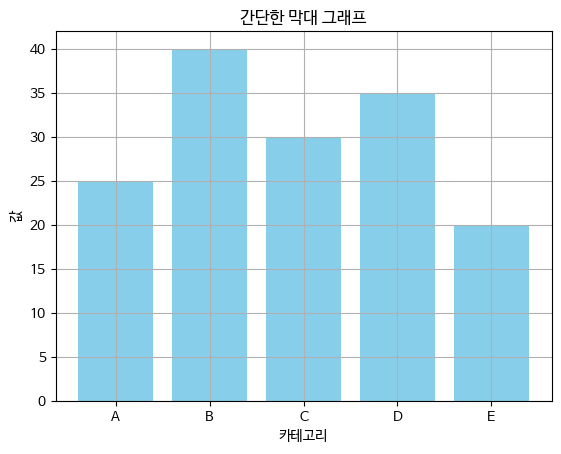

In [14]:
import matplotlib.pyplot as plt

# 샘플 데이터
categories = ['A', 'B', 'C', 'D', 'E']
values = [25, 40, 30, 35, 20]

# 막대 그래프 그리기
plt.bar(categories, values, color='skyblue')

# 축 레이블과 제목 설정
plt.xlabel('카테고리')
plt.ylabel('값')
plt.title('간단한 막대 그래프')

# 그리드 표시
plt.grid(True)

# 그래프 출력
plt.show()

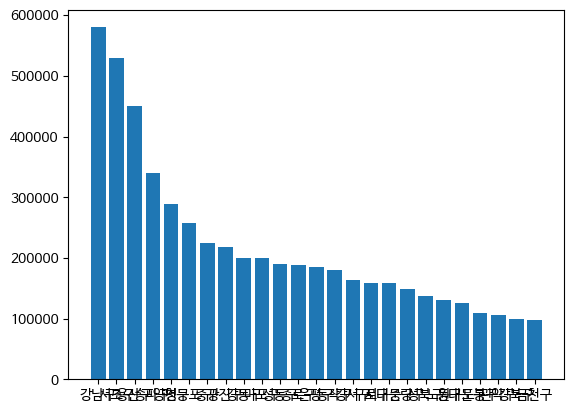

In [15]:
plt.bar(df['구'], df['가격'])
# x축 레이블 회전하기 chatGPT
#plt.xticks(rotation=45, ha='right')
plt.show()

# 당선자데이터 분석

In [16]:
df = pd.read_csv('/content/당선자total.csv')
df.columns=['0',"정당",'시도명', '시군구',"이름", "직업",'나이','생일','교육','커리어','득표율','선거명','날짜']
df['이름코드'] = df['이름'] + df['생일'].astype(str)
df['선거코드'] = df['선거명'] + df['날짜'].astype(str)
df.head()

,0,정당,시도명,시군구,이름,직업,나이,생일,교육,커리어,득표율,선거명,날짜,이름코드,선거코드
0,0,새천년민주당,전국,대한민국,노무현,정당인,56,19460806,부산상업고등학교 졸업,대전지방법원 판사,48.91,대통령선거,20021219,노무현19460806,대통령선거20021219
1,1,한나라당,서울특별시,강남구을,공성진,한양대 행정대학원 교수,50,19530420,美클레어몬트대학원 정치학박사(82.9~86.2),EBS 자문위원,57.50,국회의원선거,20040415,공성진19530420,국회의원선거20040415
2,2,한나라당,서울특별시,송파구갑,맹형규,국회의원,57,19460809,연세대학교 정치외교학과 졸업,한나라당 정책위원회 부의장,54.10,국회의원선거,20040415,맹형규19460809,국회의원선거20040415
3,3,한나라당,서울특별시,송파구을,박계동,정당인,51,19521220,고려대학교 정치외교학과 졸업,제14대 국회의원,49.30,국회의원선거,20040415,박계동19521220,국회의원선거20040415
4,4,열린우리당,서울특별시,송파구병,이근식,정당인,58,19460210,서울대학교 법학과 졸업,국민의정부 행정자치부장관,38.20,국회의원선거,20040415,이근식19460210,국회의원선거20040415


In [17]:
#가장 높은 득표율 5명
df.sort_values(by="득표율",  ascending=False)[:5]

,0,정당,시도명,시군구,이름,직업,나이,생일,교육,커리어,득표율,선거명,날짜,이름코드,선거코드
411,411,통합민주당,광주광역시,동구,박주선,변호사,58,19490723,서울대학교 법학과대학원 석사과정 2년 수료,(전)청와대 대통령 법무비서관,88.74,국회의원선거,20080409,박주선19490723,국회의원선거20080409
370,370,한나라당,대구광역시,달성군,박근혜,국회의원,56,19520202,서강대 전자공학과 졸업,(前)한나라당 대표최고위원,88.58,국회의원선거,20080409,박근혜19520202,국회의원선거20080409
5283,5283,더불어민주당,세종특별자치시,세종특별자치시제10선거구,상병헌,정당인,51,19660625,국민대학교 법과대학 법학과 졸업,(전) 문재인 대통령후보 정무특보(제19대 대통령선거),87.39,시·도의회의원선거,20180613,상병헌19660625,시·도의회의원선거20180613
543,543,한나라당,대구광역시,북구을,서상기,제17대 국회의원,62,19460129,"미국,드렉셀대학교 공학박사",(현)17대 한나라당 국회의원,86.30,국회의원선거,20080409,서상기19460129,국회의원선거20080409
4936,4936,더불어민주당,전라남도,영광군,김준성,정당인,66,19520505,호남대학교 산업경영대학원 졸업,(전)영광군의회 의장,85.02,구·시·군의 장선거,20180613,김준성19520505,구·시·군의 장선거20180613


In [19]:
#가장 많은 직업은?
df.value_counts("직업")

직업
정당인                        2041
국회의원                        528
자영업                         238
농업                          220
정치인                         140
                           ... 
더불어민주당 중구동구강화군옹진군 여성위원장       1
더불어민주당 정책위원회 부의장              1
더불어민주당 정책위 부의장                1
더불어민주당 서울은평구을 국회의원            1
힐링아이 유치원 운영자, 선양어린이집 원장       1
Length: 2152, dtype: int64

In [20]:
#당선자수 정당명별
df.value_counts("정당")

정당
더불어민주당     1534
새누리당       1164
한나라당        942
새정치민주연합     681
민주당         679
자유한국당       469
무소속         370
열린우리당       152
민주통합당       127
자유선진당       124
미래통합당       114
통합민주당        81
민주노동당        71
국민의당         49
정의당          41
통합진보당        26
국민의힘         20
미래한국당        19
더불어시민당       17
국민참여당        15
바른미래당        15
친박연대         14
친박연합         13
민주평화당        11
새천년민주당       10
자민련           4
미래연합          4
진보신당          4
열린민주당         3
국민중심연합        3
창조한국당         3
민생당           1
노동당           1
국민통합21        1
dtype: int64

In [22]:
# 정당 별 나이 평균?
df.groupby("정당")['나이'].mean()

정당
국민의당       56.204082
국민의힘       57.300000
국민중심연합     47.666667
국민참여당      44.733333
국민통합21     52.000000
노동당        49.000000
더불어민주당     52.986310
더불어시민당     48.647059
무소속        55.621622
미래연합       53.750000
미래통합당      55.921053
미래한국당      54.684211
민생당        47.000000
민주노동당      42.830986
민주당        50.745214
민주통합당      52.811024
민주평화당      60.545455
바른미래당      50.400000
새누리당       55.085052
새정치민주연합    52.143906
새천년민주당     56.100000
열린민주당      58.666667
열린우리당      49.631579
자민련        56.750000
자유선진당      56.016129
자유한국당      55.744136
정의당        47.341463
진보신당       39.500000
창조한국당      60.000000
친박연대       57.785714
친박연합       48.538462
통합민주당      53.135802
통합진보당      47.576923
한나라당       52.960722
Name: 나이, dtype: float64

In [23]:
# 대통령선거 당선자
df[df['선거명'].str.contains('대통령')]

,0,정당,시도명,시군구,이름,직업,나이,생일,교육,커리어,득표율,선거명,날짜,이름코드,선거코드
0,0,새천년민주당,전국,대한민국,노무현,정당인,56,19460806,부산상업고등학교 졸업,대전지방법원 판사,48.91,대통령선거,20021219,노무현19460806,대통령선거20021219
300,300,한나라당,전국,대한민국,이명박,정당인,66,19411219,고려대학교 경영학과 졸업,14~15대 국회의원,48.67,대통령선거,20071219,이명박19411219,대통령선거20071219
2699,2699,새누리당,전국,대한민국,박근혜,정치인,60,19520202,서강대학교 전자공학과 졸업,15대~19대 국회의원,51.55,대통령선거,20121219,박근혜19520202,대통령선거20121219
4779,4779,더불어민주당,전국,대한민국,문재인,정당인,64,19530124,경희대학교 법률학과 졸업,(전)더불어민주당 당대표,41.08,대통령선거,20170509,문재인19530124,대통령선거20170509
6918,6918,국민의힘,전국,대한민국,윤석열,정치인,61,19601218,서울대학교 대학원 졸업(법학석사),(전) 제43대 검찰총장,48.56,대통령선거,20220309,윤석열19601218,대통령선거20220309


In [24]:
# 교사 출신 당선자 찾기
df[df['직업'].str.contains('교사')]

,0,정당,시도명,시군구,이름,직업,나이,생일,교육,커리어,득표율,선거명,날짜,이름코드,선거코드
2066,2066,민주당,광주광역시,동구,채명희,기간제 교사,55,19541028,광주대학교 산업대학원 문예창작학 석사,(현) 광주남초등학교 기간제 교사,0.0,기초의원비례대표선거,20100602,채명희19541028,기초의원비례대표선거20100602
4104,4104,새정치민주연합,서울특별시,중구,이경일,보육교사(어린이집) 대표,71,19430123,명지대학교 사회복지대학원 석사졸업,(전)중구보육시설연합회장,0.0,기초의원비례대표선거,20140604,이경일19430123,기초의원비례대표선거20140604
4329,4329,새정치민주연합,부산광역시,사상구,황윤경,어린이집 교사,50,19631111,부산여자대학교 차문화복지과 전문학사 졸업,(현)(사)푸른마을 상임이사,0.0,기초의원비례대표선거,20140604,황윤경19631111,기초의원비례대표선거20140604
6267,6267,더불어민주당,전라북도,김제시,고미정,돌봄교사,49,19690315,전주대학교 사범대학 한문교육학과 졸업,(현)금구초등학교 돌봄교사,0.0,기초의원비례대표선거,20180613,고미정19690315,기초의원비례대표선거20180613
6304,6304,자유한국당,인천광역시,서구,김이경,영유아교육교사,39,19780830,경희대학교 지리학과 졸업,(전)(주)아가월드 교육교사,0.0,기초의원비례대표선거,20180613,김이경19780830,기초의원비례대표선거20180613
6381,6381,더불어민주당,경상북도,영주시,이서윤,(주)대교학습지교사,45,19721021,대구대학교 정보통신공학과 졸업,(현) 더불어민주당 경북도당 청소년진로교육특별위원장,0.0,기초의원비례대표선거,20180613,이서윤19721021,기초의원비례대표선거20180613


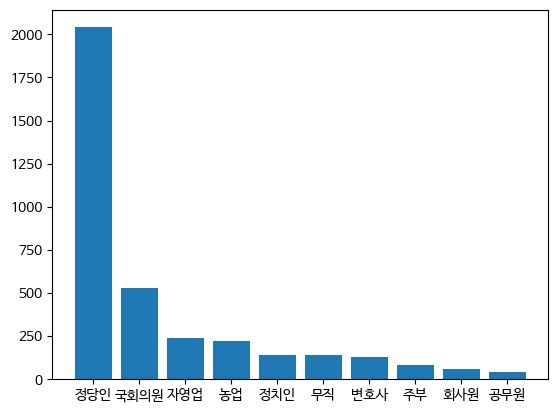

In [27]:
# 가장 많은 직업 그래프 그리기
new = df.value_counts("직업")[:10]
new.info
plt.bar(new.index, new.values) #각각의 데이터의 이름이 무엇인지 확인하기 chatGPT
plt.show()

# 정규식 실습

## 정규식 regular expression
*   정규식(Regular Expression): 문자열을 처리하고 검색하는 데 사용되는 강력한 도구

*   파이썬에서는 re 모듈을 통해 정규식을 지원

*   정규식은 패턴을 정의하고 해당 패턴과 일치하는 문자열을 찾거나 변환하는 데 사용됨

In [28]:
import re

In [29]:
# 예제 문자열
text = "Hello, my name is John. My email is john@example.com."

# 정규식 패턴과 일치하는 문자열 찾기
pattern1 = r"John"
result1 = re.findall(pattern1, text)
print("정규식 패턴 'John'과 일치하는 문자열:", result1)

정규식 패턴 'John'과 일치하는 문자열: ['John']


In [30]:
# 이메일 주소 찾기
pattern2 = r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}"
result2 = re.findall(pattern2, text)
print("이메일 주소:", result2)

이메일 주소: ['john@example.com']


In [31]:
# 문자열 대체하기
pattern3 = r"John"
replace_text = "Mike"
result3 = re.sub(pattern3, replace_text, text)
print("문자열 대체 결과:", result3)

문자열 대체 결과: Hello, my name is Mike. My email is john@example.com.


In [32]:
variables = "02-1123-2235, 012-1222-5566, upan@upan.com, idontknow@upan.com, 121212-2233445, 231211-4212345"

In [33]:
# 전화번호 찾기
print(re.findall('\d+-\d+-\d+', variables))

['02-1123-2235', '012-1222-5566']


In [34]:
# 주민등록번호 찾기
print(re.findall('\d{6}-\d{7}', variables))

['121212-2233445', '231211-4212345']


In [35]:
# 이메일 주소 찾기
print(re.search(r'[a-z]@[a-z\.]', variables))
print(re.findall(r'[a-z]+@[a-z\.]+', variables))

<re.Match object; span=(32, 35), match='n@u'>
['upan@upan.com', 'idontknow@upan.com']


In [36]:
#split을 통한 문장 나누기
sentences = '''나는 이런 논문을 봤습니다(Great, 2020). 이런 문장을 많이 봅니다(James, 2012). 이런 인용구가 흔합니다(이동민, 2020).'''
# 문장 나누기
split_sentences = re.split('\.', sentences)
print(split_sentences)

['나는 이런 논문을 봤습니다(Great, 2020)', ' 이런 문장을 많이 봅니다(James, 2012)', ' 이런 인용구가 흔합니다(이동민, 2020)', '']


In [37]:
#인용구만 찾기
print(re.findall('\(\D+\d{4}\)',sentences))

['(Great, 2020)', '(James, 2012)', '(이동민, 2020)']


## 어린왕자에서 어른이 들어간 문장만 찾아보기

In [39]:
f = open('/content/little_prince.txt', 'r', encoding='utf8')
total = f.read()
for i in re.split('\.',total): # 문장 나누기
    if re.search('어른',i): # 어른이 들어간 문장 찾기
        print(i) # 출력하기

이 책을 어른에게 바친 데 대해 어린이들에게 용서를 빈다
 이 어른은 이 세상에서 나와 가장 친한 친구인 것이다
 또 다른 이유도 있는데 그것을 이 어른이 모든 걸, 어린이를 위한 책들까지도 모두 이해한다는 점이다
 세번째 이유는 이 어른이 프랑스에서 살고 있는데 그곳에서 굶주리고 추위에 떨고 있다는 것이다
 어른들은 누구나 다 처음엔 어린아이였다(그러나 그것을 기억하는 어른은 그다지 많지 않다)




 

나는 그 걸작품을 어른들에게 보여 주면서 내 그림이 무섭지 않느냐고 물었다
 그래서 나는 어른들이 알아볼 수 있도록 보아 구렁이의 속을 그렸다
 어른들은 언제나 설명을 해주어야만 한다


 



 

어른들은 속이 보이거나 보이지 않거나 하는 보아 구렁이의 그림들은 집어치우고 차라리 지리, 역사, 계산, 그리고 문법 쪽에 관심을 가져 보는 게 좋을 것이라고 충고해 주었다
 어른들은 언제나 스스로는 아무것도 이해하지 못한다
 어른들 틈에서 많이 살아온 것이다
 그러면 그 어른은 매우 착실한 청년을 알게 된 것을 몹시 기뻐했다
 여섯 살 적에 어른들이 화가로 출세할 수 없다고 나를 낙심시켰기 때문에 나는 속이 보이지 않거나 보이거나 하는 구렁이 이외에는 아무것도 그리는 연습을 하지 않았으니까 말이다
 어른들이란 모두 이런 식이다


내가 소행성 B612호에 관해 이렇게 자세히 이야기하고 그 번호까지 일러 주는 것은 어른들 때문이다
 어른들은 숫자를 좋아한다
 만약 어른들에게 "창턱에는 제라늄 화분이 있고 지붕에는 비둘기가 있는 분홍빛의 벽돌집을 보았어요
 어른들은 다 그런 것이다
 어린아이들은 어른들을 항상 너그럽게 대해야만 한다
 그를 잊는다면 나도 숫자밖에는 흥미가 없는 어른들과 같은 사람이 될지도 모른다
 나도 조금은 어른들과 비슷한지도 모를 일이다


"아저씨는 어른들처럼 말하고 있잖아!"

그 말에 나는 조금 부끄러워졌다


'어른들은 참 이상하군'하고 어린 왕자는 여행하면서 속으로 중얼거렸다


'어른들은 정말 이상하군'하고 어린 왕자는 여행하면